In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Set to display all columns
pd.set_option('display.max_columns', None)

# Set to display 50 rows 
pd.set_option('display.max_rows', 50)

# Importing the movie dataset
movie = pd.read_csv('../data/Original_CMU/movie.metadata.tsv', sep= '\t', header=None)

movie.columns = ['WikiID', 'FreebaseID', 'Name', 'ReleaseDate',
                     'Revenue', 'Runtime', 'Languages_tuple', 'Countries_tuples', 'Genres_tuples']
movie.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [2]:
print(movie.shape)
print(movie.dtypes)

(81741, 9)
WikiID                int64
FreebaseID           object
Name                 object
ReleaseDate          object
Revenue             float64
Runtime             float64
Languages_tuple      object
Countries_tuples     object
Genres_tuples        object
dtype: object


# Checking missing values in the movie dataset

In [3]:
print((pd.isna(movie.iloc[:,:6]).sum()) / len(movie))
print((movie.iloc[:, 6:] == '{}').sum() / len(movie))

WikiID         0.000000
FreebaseID     0.000000
Name           0.000000
ReleaseDate    0.084437
Revenue        0.897224
Runtime        0.250180
dtype: float64
Languages_tuple     0.169633
Countries_tuples    0.099754
Genres_tuples       0.028064
dtype: float64


# Data Processing

## Parsing tuples into lists

In [4]:
import ast

def conv_to_dict(val): 
    try:
        return ast.literal_eval(val) if pd.notna(val) else {}
    except (ValueError, SyntaxError):
        return {}

def get_list(x):
    return list(x.values())

In [5]:
movie['Languages'] = movie['Languages_tuple'].apply(conv_to_dict).apply(get_list)
movie['Countries'] = movie['Countries_tuples'].apply(conv_to_dict).apply(get_list)
movie['Genres'] = movie['Genres_tuples'].apply(conv_to_dict).apply(get_list)

In [6]:
movie.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[German Language],[Germany],[Drama]


## Importing the movie summary plot dataset

In [7]:
plots = pd.read_csv('../data/Original_CMU/plot_summaries.txt', sep='\t', header=None)
plots.columns = ['WikiID', 'Plot']
plots.head()

,WikiID,Plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


## Importing the character dataset

In [8]:
characters = pd.read_csv('../data/Original_CMU/character.metadata.tsv', sep= '\t', header=None)
characters.columns = ['WikiMovieID', 'FreebaseMovieID', 'MovieReleaseDate','CharacterName',
                      'ActorBirthDate', 'ActorGender', 'ActorHeight','ActorEthnicity', 
                      'ActorName', 'ActorAge', 'CharacterActorMap', 'CharacterID', 'ActorID']
characters.head()

,WikiMovieID,FreebaseMovieID,MovieReleaseDate,CharacterName,ActorBirthDate,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAge,CharacterActorMap,CharacterID,ActorID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


### Checking missing values of the character dataset

In [9]:
pd.isna(characters).sum() / len(characters)

WikiMovieID          0.000000
FreebaseMovieID      0.000000
MovieReleaseDate     0.022178
CharacterName        0.572205
ActorBirthDate       0.235528
ActorGender          0.101203
ActorHeight          0.656457
ActorEthnicity       0.764665
ActorName            0.002725
ActorAge             0.350841
CharacterActorMap    0.000000
CharacterID          0.572183
ActorID              0.001808
dtype: float64

## Importing the tvtropes dataset

In [10]:
tvtropes_clusters = pd.read_csv('../data/Original_CMU/tvtropes.clusters.txt', sep='\t', header=None)
tvtropes_clusters.columns = ['Instances', 'Dictionary_str']
tvtropes_clusters.head()

,Instances,Dictionary_str
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [11]:
tvtropes_clusters['Dictionary'] = tvtropes_clusters['Dictionary_str'].apply(conv_to_dict)

# Create column for each key in the dictionary
c = tvtropes_clusters['Dictionary'].apply(pd.Series)
tvtropes_new = pd.concat([tvtropes_clusters['Instances'], c], axis=1)
tvtropes_new.rename(columns= {'id': 'CharacterActorMap'}, inplace=True)
tvtropes_new.head()

,Instances,char,movie,CharacterActorMap,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


## Merging the movie and the summary plot datasets

In [12]:
movie_plot = movie.merge(plots, on='WikiID', how='left')
movie_plot.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[German Language],[Germany],[Drama],"Eva, an upper class housewife, becomes frustra..."


### Extracting only release year from release date as there are a lot of entries with just years

In [13]:
movie_plot['merge_year'] = movie_plot['ReleaseDate'].apply(lambda x: x.split('-')[0] if pd.notna(x) else None).astype('Int64')

# EDA on the merged dataset

<Axes: xlabel='merge_year', ylabel='Count'>

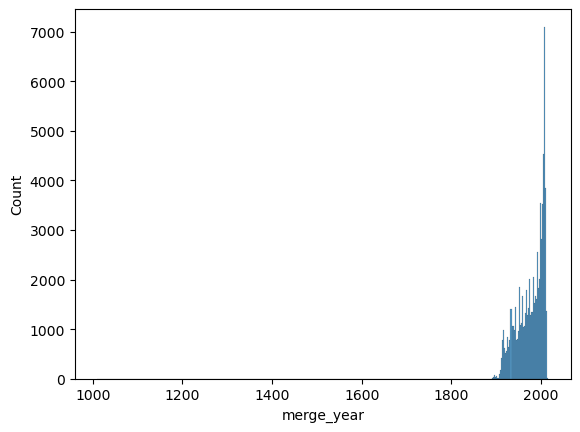

In [14]:
sns.histplot(x='merge_year', data=movie_plot)

### There seems to be an outlier somewhere...

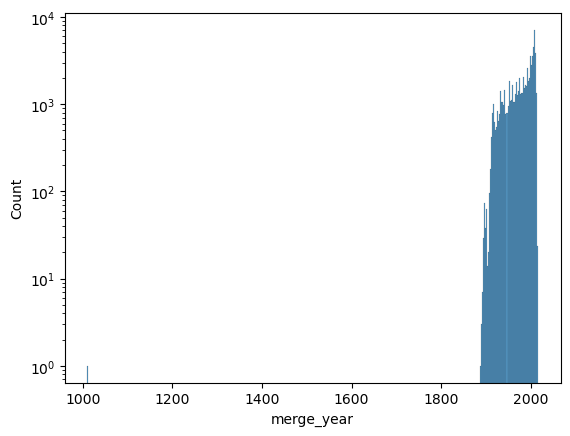

In [15]:
hist = sns.histplot(x='merge_year', data=movie_plot)
hist.set_yscale('log')

In [16]:
movie_plot['merge_year'].min()

np.int64(1010)

### Movie released in 1010 seems weird...

In [17]:
movie_plot[movie_plot['merge_year'] == 1010]

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,merge_year
62836,29666067,/m/0fphzrf,Hunting Season,1010-12-02,12160978.0,140.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...","[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]",Veteran homicide cop Ferman and his hot-heade...,1010


### Hunting Season is a movie released in 2010, so must be a typo!

In [18]:
movie_plot.loc[movie_plot['merge_year'] == 1010, 'merge_year'] = 2010
movie_plot.loc[movie_plot['ReleaseDate'] == '1010-12-02', 'ReleaseDate'] = '2010-12-02'
movie_plot[movie_plot['Name'] == 'Hunting Season']

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,merge_year
62836,29666067,/m/0fphzrf,Hunting Season,2010-12-02,12160978.0,140.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...","[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]",Veteran homicide cop Ferman and his hot-heade...,2010


In [19]:
movie_languages_expanded = movie_plot.explode('Languages').reset_index(drop=True).copy()
movie_languages_expanded.shape

(95172, 14)

In [20]:
top_languages = movie_languages_expanded['Languages'].value_counts().nlargest(5).index
movie_languages_expanded['Languages'] = movie_languages_expanded['Languages'].apply(lambda x: x if x in top_languages else 'Other')

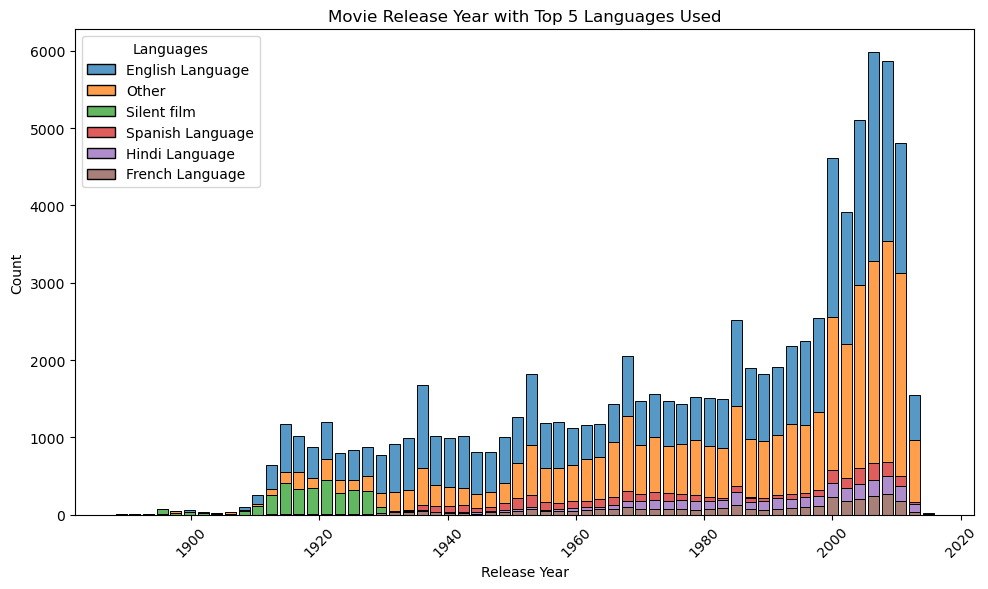

In [21]:
plt.figure(figsize=(10, 6))
# sns.histplot(data=movie_languages_expanded, x='merge_year', hue='Languages', multiple='stack', shrink=0.8, palette="tab10")
sns.histplot(data=movie_languages_expanded, x='merge_year', hue='Languages', multiple='stack', shrink=0.8)

handles, labels = plt.gca().get_legend_handles_labels()

plt.title('Movie Release Year with Top 5 Languages Used')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
movie_genres_expanded = movie_plot.explode('Genres').reset_index(drop=True).copy()
movie_genres_expanded.shape

(245623, 14)

In [23]:
top_genres = movie_genres_expanded['Genres'].value_counts().nlargest(5).index
movie_genres_expanded['Genres'] = movie_genres_expanded['Genres'].apply(lambda x: x if x in top_genres else 'Other')

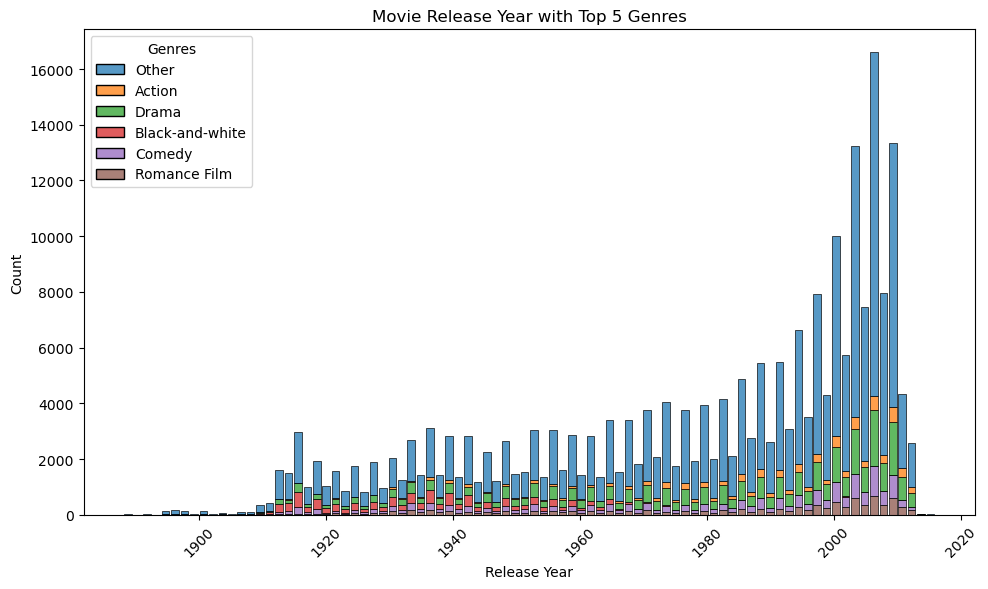

In [24]:
plt.figure(figsize=(10, 6))
# sns.histplot(data=movie_genres_expanded, x='merge_year', hue='Genres', multiple='stack', shrink=0.8, palette="tab10")
sns.histplot(data=movie_genres_expanded, x='merge_year', hue='Genres', multiple='stack', shrink=0.8)

handles, labels = plt.gca().get_legend_handles_labels()

plt.title('Movie Release Year with Top 5 Genres')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#for each caracter associate his tvtropes type 
#there are only 501 character/actor pair that have an associated tvtropse type, some character/actor pair have multiple tvtropes type

#es
print(tvtropes_new['CharacterActorMap'].value_counts())
print(tvtropes_new[tvtropes_new['CharacterActorMap'] == '/m/0k1xxm'])

#We need to group the instances by the character/actor pair

In [ ]:
grouped_instances = tvtropes_new.groupby('CharacterActorMap').agg({'Instances' : lambda x: x.tolist()}).reset_index()

print(grouped_instances['CharacterActorMap'].is_unique)
grouped_instances[grouped_instances['CharacterActorMap'] == '/m/0k1xxm']

In [ ]:
grouped_instances = tvtropes_new.groupby('CharacterActorMap').agg({'Instances' : lambda x: x.tolist()}).reset_index()

print(grouped_instances['CharacterActorMap'].is_unique)
grouped_instances[grouped_instances['CharacterActorMap'] == '/m/0k1xxm']

In [ ]:
character_instances = characters.merge(grouped_instances, on = 'CharacterActorMap', how = 'left')
print(character_instances.shape)

In [ ]:
def enumerate_dict(x):
    return {i + 1: val for i, val in enumerate(x.tolist())}

In [ ]:
# Apply the function in the groupby aggregation
grouped_char = character_instances.groupby('WikiMovieID').agg({
    'CharacterName': enumerate_dict,
    'CharacterID': enumerate_dict,
    'Instances': enumerate_dict,
    'CharacterActorMap': enumerate_dict,
    'ActorID': enumerate_dict,
    'ActorName': enumerate_dict,
    'ActorAge': enumerate_dict,
    'ActorGender': enumerate_dict,
    'ActorBirthDate': enumerate_dict,
    'ActorHeight': enumerate_dict,
}).reset_index()

grouped_char.head()

In [ ]:
grouped_char['WikiMovieID'].is_unique

In [ ]:
#Now we can merge the character_instances with the movie_plot dataset

movie_plot_char = movie_plot.merge(grouped_char, left_on = 'WikiID', right_on = 'WikiMovieID', how = 'left')
print(movie_plot_char.shape)

In [ ]:
movie_plot_char.head()

In [ ]:
# load ratings dataset

ratings = pd.read_csv('../data/Movie_Ratings/ratings.csv')
ratings.shape

In [ ]:
m_ratings = pd.read_csv('../data/Movie_Ratings/movies.csv')
m_ratings.shape

In [ ]:
grouped_ratings = ratings.groupby('movieId')['rating'].agg(['mean', 'std', 'count']).reset_index()

grouped_ratings.shape

In [ ]:
name_ratings = m_ratings.iloc[:,:2].merge(grouped_ratings, on = 'movieId', how = 'left')
name_ratings.head()

In [ ]:
name_ratings['merge_title'] = name_ratings['title'].str.extract(r'^(.*?)(?=\s\()')[0].str.lower()
name_ratings['merge_year'] = name_ratings['title'].str.extract(r'\((\d{4})\)')[0].astype('Int64')

movie_plot_char['merge_title'] = movie_plot_char['Name'].str.lower().str.strip()
movie_plot_char['merge_year'] = movie_plot_char['ReleaseDate'].apply(lambda x: x.split('-')[0] if pd.notna(x) else None).astype('Int64')

df_final = movie_plot_char.merge(name_ratings, on = ['merge_title', 'merge_year'], how = 'left')

In [ ]:
df_final.head()

In [ ]:
print(df_final.isna().sum()/len(df_final))

In [ ]:
len(df_final)

In [ ]:
# df_final.to_csv('../data/processed/df_final.csv', index=False)